In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from seaborn import load_dataset
from sklearn.decomposition import KernelPCA

In [4]:
df = load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
X = df.drop(columns='species')
features = KernelPCA(n_components=3).fit_transform(X)
px.scatter_3d(x=features[:,0], y=features[:,1], z=features[:,2])

In [13]:
from sklearn.cluster import KMeans

In [17]:
wcss = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(features)
    wcss.append({
        'k': k,
        'wcss': model.inertia_
    })    

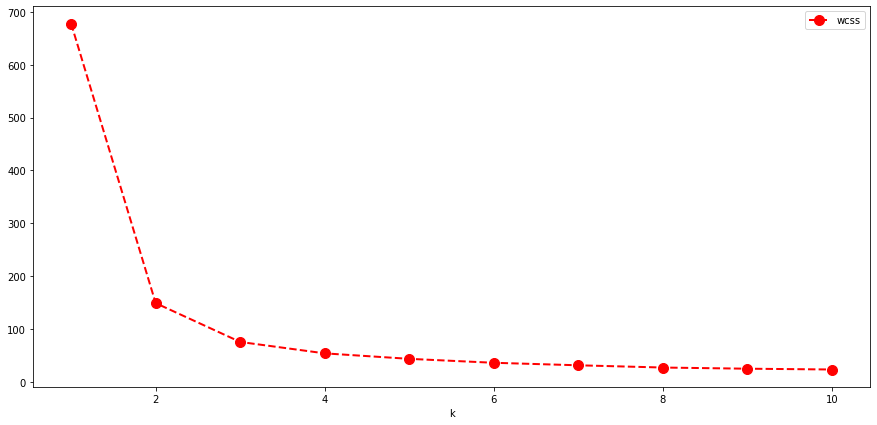

In [27]:
pd.DataFrame(wcss).plot(kind='line',x='k',y='wcss',
    linewidth=2, markersize=10, style='ro--', figsize=(15,7))
plt.show()

In [32]:
model = KMeans(n_clusters=3)
model.fit(features)
groups = model.predict(features)
# print(groups)
px.scatter_3d(x=features[:,0], y=features[:,1], 
    z=features[:,2], color=groups, symbol=groups)

In [34]:
from sklearn.pipeline import make_pipeline

In [35]:
model = make_pipeline(KernelPCA(n_components=2), KMeans(n_clusters=3))
model

Pipeline(steps=[('kernelpca', KernelPCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3))])

In [37]:
model.fit(X)

Pipeline(steps=[('kernelpca', KernelPCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3))])

In [38]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])